<a href="https://colab.research.google.com/github/tirzors07/KDD/blob/main/shoe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install plotly
!pip install tabulate

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
# Abrir y cargar el dataset
with open('/content/drive/My Drive/KDD_2025-1/SHOE/MEN_SHOES.csv', 'r') as file:
    df = pd.read_csv(file)

In [36]:
#primeros renglones del dataset
df

,Brand_Name,How_Many_Sold,Current_Price,Product_details,RATING
0,ASIAN,"2,242","₹1,098","Oxygen-01 Sports Running,Walking & Gym Shoes w...",3.8
1,ASIAN,240,₹674,"Men's Express-08 Sports Running,Walking,Gym,Tr...",4.0
2,ASIAN,"16,662",₹588,"Men's Cosko Sports Running,Walking,Gym,Trainin...",3.8
3,ASIAN,135,₹599,"Wind-03 Sports Running,Walking & Gym Shoes wit...",4.0
4,Reebok,240,₹982,Men's Velocity Runner Lp Running Shoe,4.0
...,...,...,...,...,...
23935,Campus,198,₹623,Men's HARVEL PRO Running Shoes,4.0
23936,Wakefield,49,₹399,Stylish Running Sports Shoes for MEN-2010,3.4
23937,URJO,557,₹839,Mens Running Shoes,4.2
23938,FEETEES,63,₹349,Nexon Men's Casual Eva Socks Knitted Running S...,3.6


In [37]:
df.shape

(23940, 5)

In [38]:
#cantidad de valores nulos en los atributos
df.isnull().sum()

,0
Brand_Name,0
How_Many_Sold,0
Current_Price,798
Product_details,0
RATING,0


In [39]:
# Let's get an overview of features datatype
df.dtypes

,0
Brand_Name,object
How_Many_Sold,object
Current_Price,object
Product_details,object
RATING,float64


In [40]:
#valores unicos en precio actual
df['Current_Price'].unique()

array(['₹1,098', '₹674', '₹588', '₹599', '₹982', nan, '₹498', '₹298',
       '₹880', '₹439', '₹1,005', '₹780', '₹499', '₹579', '₹702', '₹1,279',
       '₹1,199', '₹649', '₹399', '₹524', '₹1,399', '₹1,282', '₹590',
       '₹722', '₹1,080', '₹637', '₹774', '₹532', '₹1,485', '₹231', '₹759',
       '₹1,231', '₹849', '₹900', '₹799', '₹901', '₹899', '₹699', '₹779',
       '₹698', '₹2,159', '₹855', '₹598', '₹1,173', '₹2,008', '₹623',
       '₹839', '₹349', '₹1,299'], dtype=object)

In [41]:
#remplazar caracteres especiales
df['How_Many_Sold'] = df['How_Many_Sold'].str.replace(',', '')
df['Current_Price'] = df['Current_Price'].str.replace(',', '').str.replace('₹', '')

In [42]:
# convertir cadena a numero
df['How_Many_Sold'] = df['How_Many_Sold'].astype(int)
df['Current_Price'] = pd.to_numeric(df['Current_Price'], errors='coerce').apply(np.floor).astype('Int64')
df['Current_Price'].unique()
df.dropna(inplace=True)

In [43]:
#primeros renglones del dataset
df

,Brand_Name,How_Many_Sold,Current_Price,Product_details,RATING
0,ASIAN,2242,1098,"Oxygen-01 Sports Running,Walking & Gym Shoes w...",3.8
1,ASIAN,240,674,"Men's Express-08 Sports Running,Walking,Gym,Tr...",4.0
2,ASIAN,16662,588,"Men's Cosko Sports Running,Walking,Gym,Trainin...",3.8
3,ASIAN,135,599,"Wind-03 Sports Running,Walking & Gym Shoes wit...",4.0
4,Reebok,240,982,Men's Velocity Runner Lp Running Shoe,4.0
...,...,...,...,...,...
23935,Campus,198,623,Men's HARVEL PRO Running Shoes,4.0
23936,Wakefield,49,399,Stylish Running Sports Shoes for MEN-2010,3.4
23937,URJO,557,839,Mens Running Shoes,4.2
23938,FEETEES,63,349,Nexon Men's Casual Eva Socks Knitted Running S...,3.6


In [44]:
# Summary Statistics
df.describe()

,How_Many_Sold,Current_Price,RATING
count,23142.000000,23142.0,23142.00000
mean,3607.896552,842.258621,3.82069
std,10896.836132,387.523381,0.40462
min,2.000000,231.0,2.40000
25%,173.000000,588.0,3.60000
50%,406.500000,776.5,4.00000
75%,1795.000000,1080.0,4.00000
max,72611.000000,2159.0,4.40000


In [45]:
# drop duplicates
df = df.drop_duplicates()

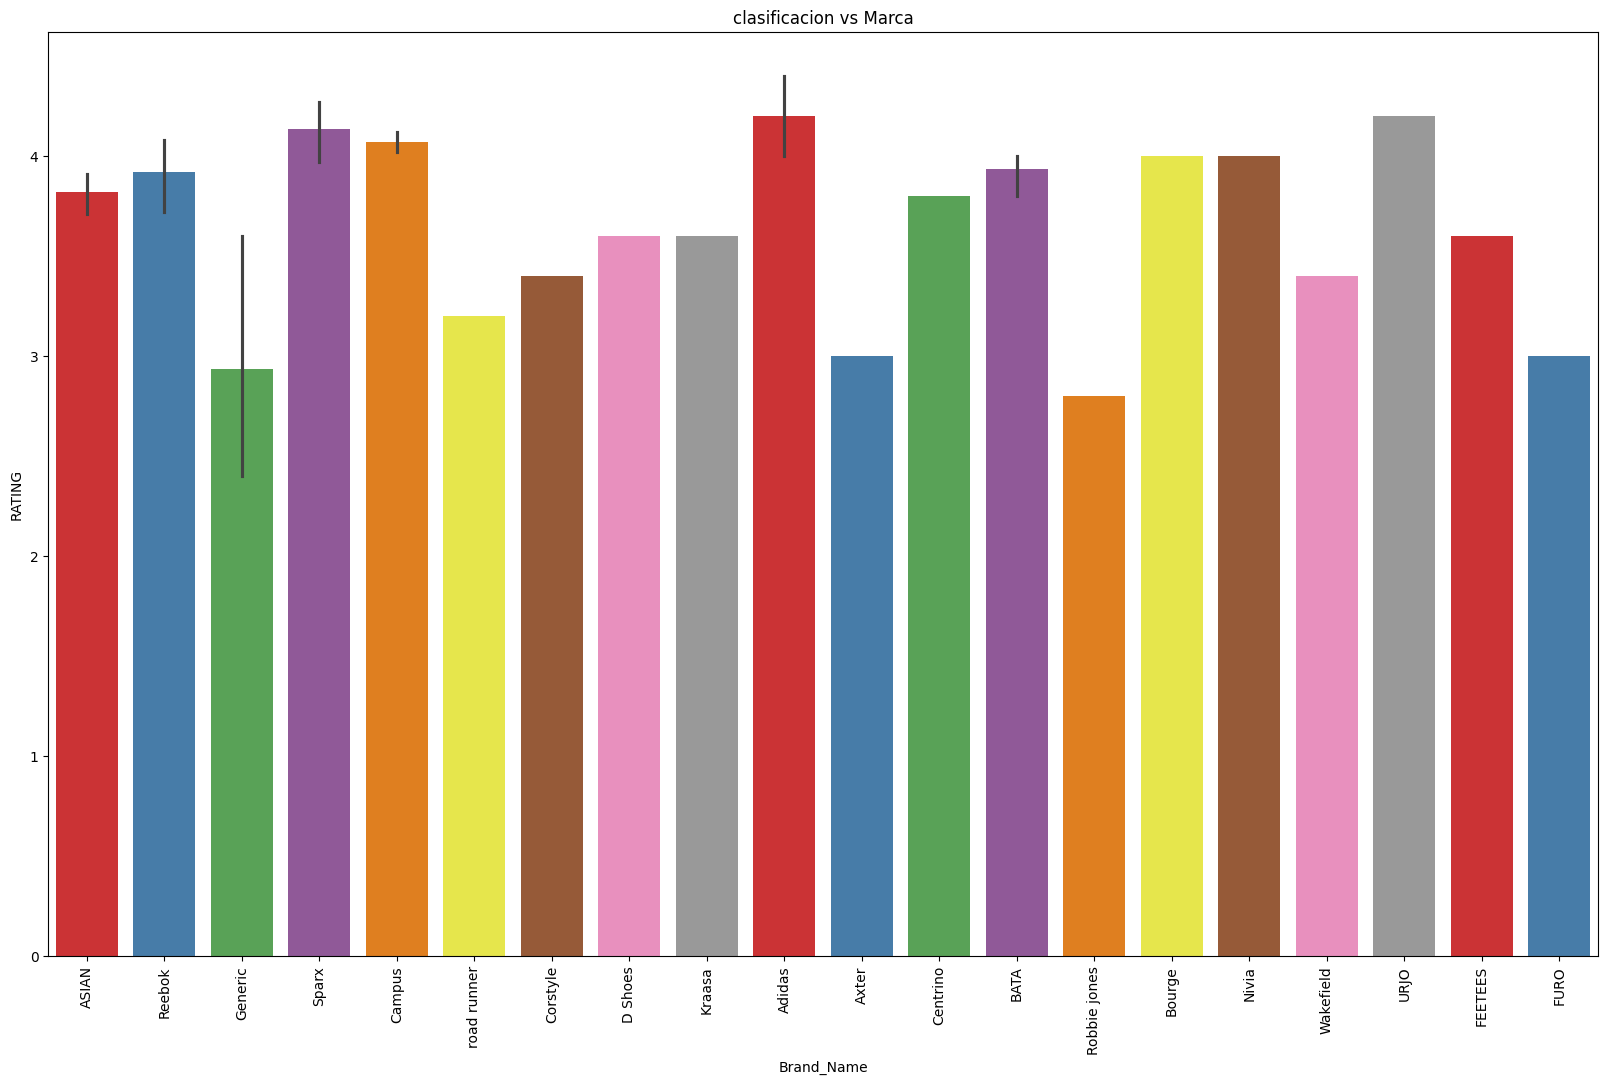

In [47]:
#nombre marca vs calsificacion
plt.figure(figsize=(20,12))
sns.barplot(x = 'Brand_Name',y = 'RATING',data = df,palette='Set1').set(title = "clasificacion vs Marca");
plt.xticks(rotation = 90)
plt.show()

In [48]:
#marcas mas populares
most_popular_brands = df.groupby('Brand_Name')[['How_Many_Sold']].sum().reset_index()
most_popular_brands

,Brand_Name,How_Many_Sold
0,ASIAN,103115
1,Adidas,5314
2,Axter,350
3,BATA,5945
4,Bourge,18747
5,Campus,14913
6,Centrino,682
7,Corstyle,7
8,D Shoes,1490
9,FEETEES,63


In [49]:
fig = px.bar(most_popular_brands, x='Brand_Name', y='How_Many_Sold',color='Brand_Name', title='Marcas más populares')
fig.show()

In [59]:
max_shoes_sold = df['How_Many_Sold'].max()
max_shoes_sold_brand = df.loc[df['How_Many_Sold'] == max_shoes_sold]
max_shoes_sold_brand

,Brand_Name,How_Many_Sold,Current_Price,Product_details,RATING,Income_$
6,ASIAN,72611,498,Men's Wonder-13 Sports Running Shoes,4.0,36160278


In [ ]:
# Matriz de correlacion
df.select_dtypes(include=['number']).corr()
df_numeric = df.select_dtypes(include=['number'])
plt.figure(figsize=(8,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".3f")#
plt.title("Matriz de Correlación", fontsize=14)
plt.show()

In [55]:
df['Income_$'] = df.apply(lambda x: x['How_Many_Sold'] * x['Current_Price'], axis=1)

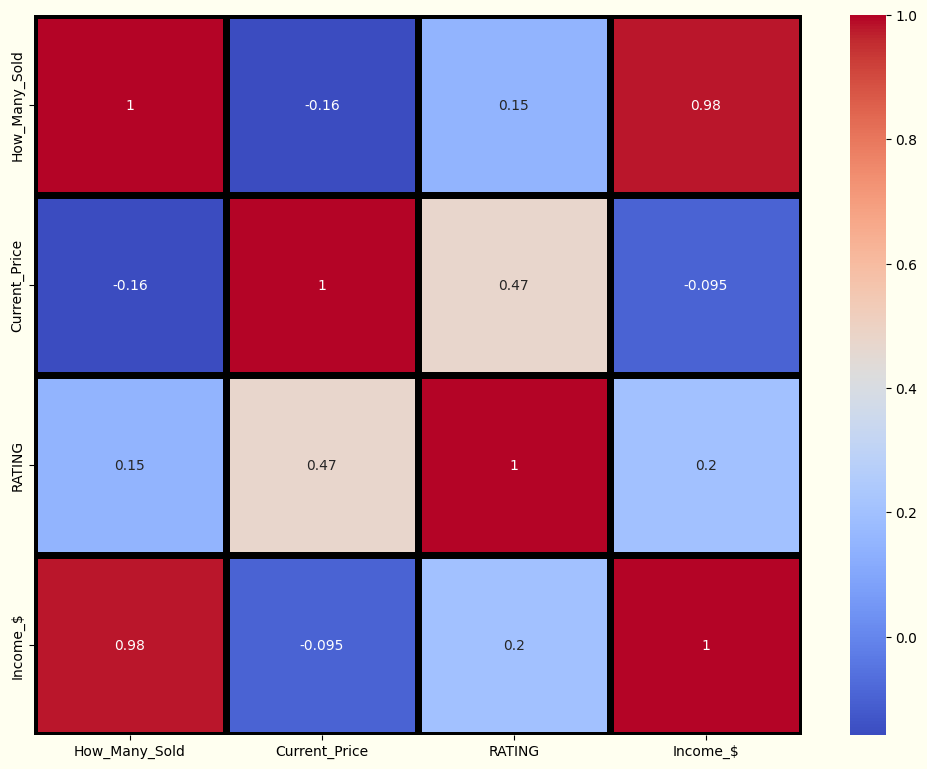

In [54]:
#matriz de correlacion
df.select_dtypes(include=['number']).corr()
df_corr = df.select_dtypes(include=['number'])
fig = plt.figure()
axes = fig.add_axes([0, 0, 1.5, 1.5])
sns.heatmap(data=df_corr.corr(), annot=True, cmap='coolwarm', linewidth=5, linecolor='k')
fig.set_facecolor(color='#FFFFF0')
fig.show()


Text(0.5, 0.98, 'Diagrama de Cajas para Detectar Outliers')

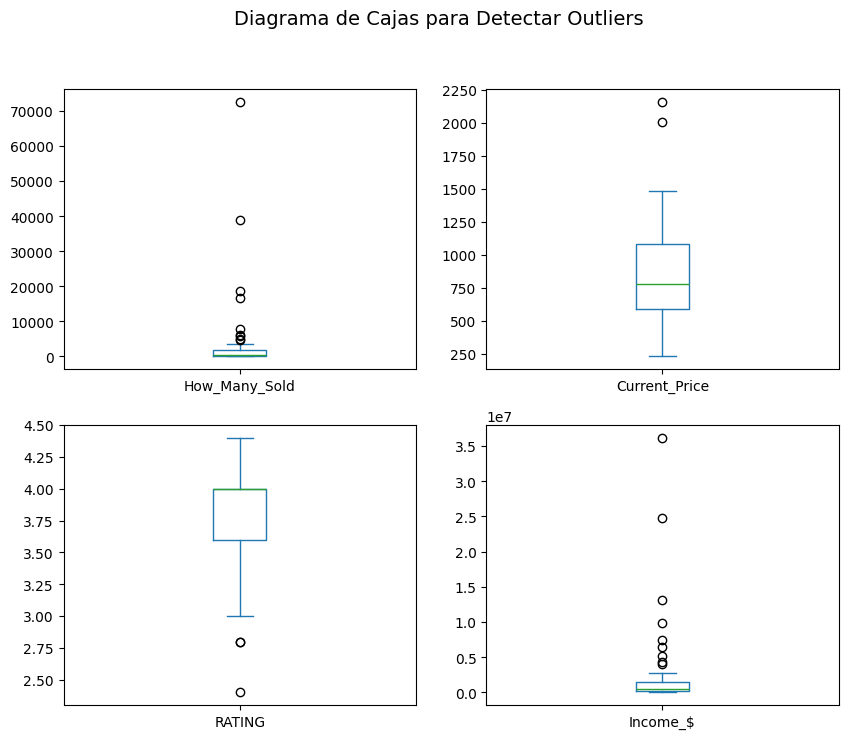

In [53]:
#outliers y diagrama de cajas
df.plot(kind='box', subplots=True, layout=(2,2), figsize=(10,8), sharex=False, sharey=False)
plt.suptitle("Diagrama de Cajas para Detectar Outliers", fontsize=14)
#plot.show()

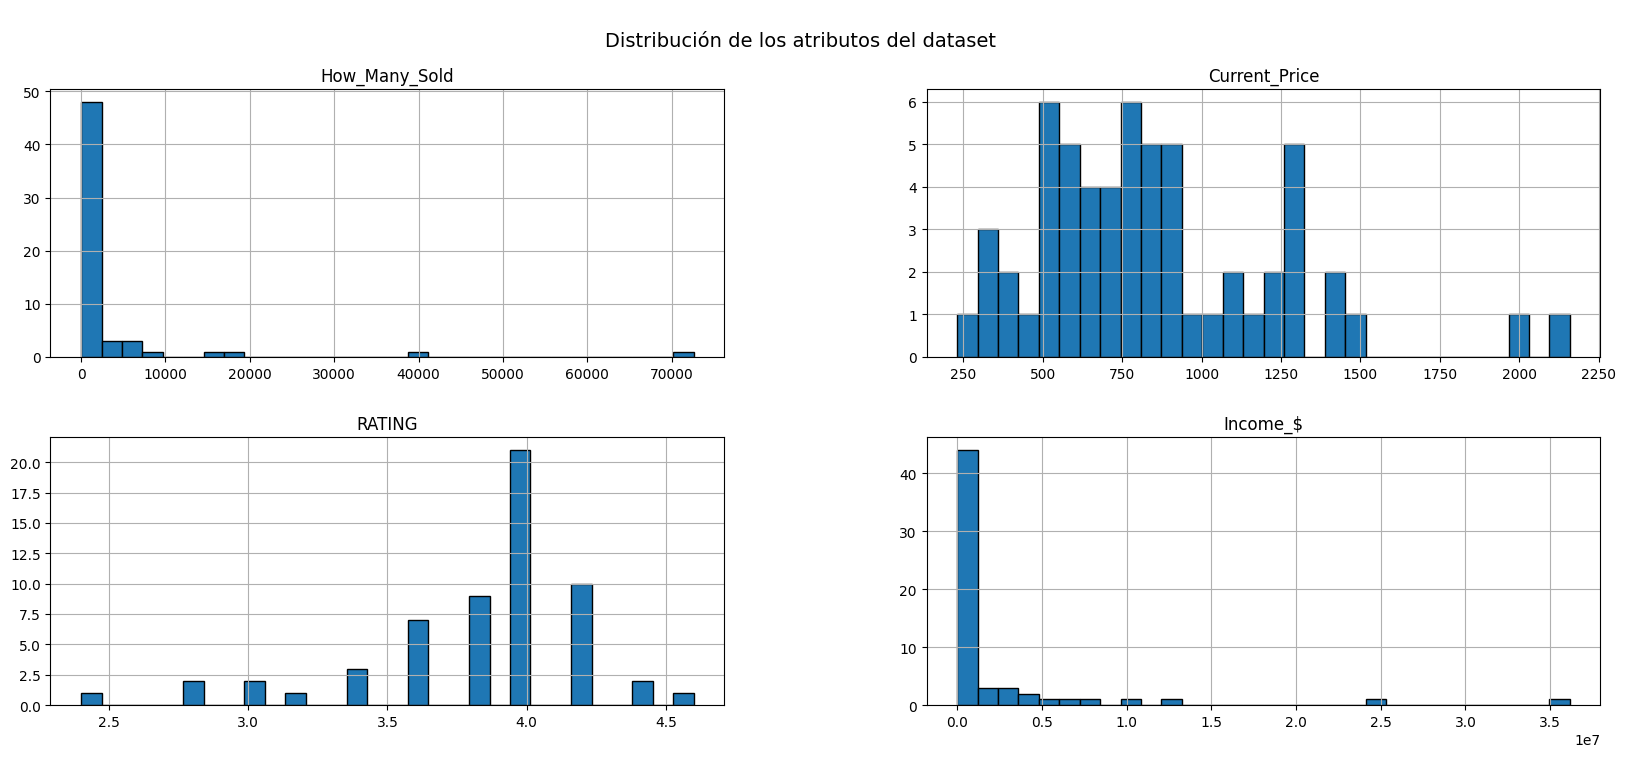

In [30]:
# Histograma de las variables numéricas
df.hist(figsize=(20,8), bins=30, edgecolor='black')
plt.suptitle("\nDistribución de los atributos del dataset", fontsize=14)
plt.show()

In [16]:
# Convertir Current_Price a string, eliminar caracteres extraños y manejar valores vacíos
df["Current_Price"] = (
    df["Current_Price"]
    .astype(str)
    .str.replace(r'[^\d.]', '', regex=True)  # Eliminar caracteres no numéricos excepto '.'
    .replace('', np.nan)  # Reemplazar cadenas vacías con NaN
    .astype(float)  # Convertir a número
)

# Ver cuántos valores NaN hay después de la conversión
print("Valores NaN en Current_Price después de limpieza:", df["Current_Price"].isna().sum())

# Opcional: Rellenar los NaN con la media de la columna (corrigiendo la advertencia)
df["Current_Price"] = df["Current_Price"].fillna(df["Current_Price"].mean())
# Descripción estadística
print("\nResumen Estadístico:")
print(df.describe())
# Verificar si hay valores no numéricos
#print(df["How_Many_Sold"].dtype)  # Debe ser float64 o int64
#print(df["How_Many_Sold"].head(10))  # Ver los primeros valores

# Contar valores nulos
print("Valores NaN en How_Many_Sold:", df["How_Many_Sold"].isnull().sum())

# Eliminar comas y convertir a numérico
df["How_Many_Sold"] = df["How_Many_Sold"].astype(str).str.replace(',', '', regex=True).astype(float)

# Verificar que la conversión fue exitosa
print(df["How_Many_Sold"].dtype)  # Debe mostrar float64

# Llenar valores nulos con la mediana
df["How_Many_Sold"].fillna(df["How_Many_Sold"].median(), inplace=True)

#print(df["How_Many_Sold"].head(10))  # Ver cómo se ven los datos después de la conversión
#print(df["How_Many_Sold"].dtype)  # Verificar que es float64

Valores NaN en Current_Price después de limpieza: 2

Resumen Estadístico:
       How_Many_Sold  Current_Price     RATING
count      59.000000      59.000000  59.000000
mean     3552.288136     845.210526   3.833898
std     10905.012661     386.873620   0.417137
min         2.000000     231.000000   2.400000
25%       169.000000     589.000000   3.600000
50%       421.000000     780.000000   4.000000
75%      1740.000000    1042.500000   4.000000
max     72611.000000    2159.000000   4.600000
Valores NaN en How_Many_Sold: 0
float64


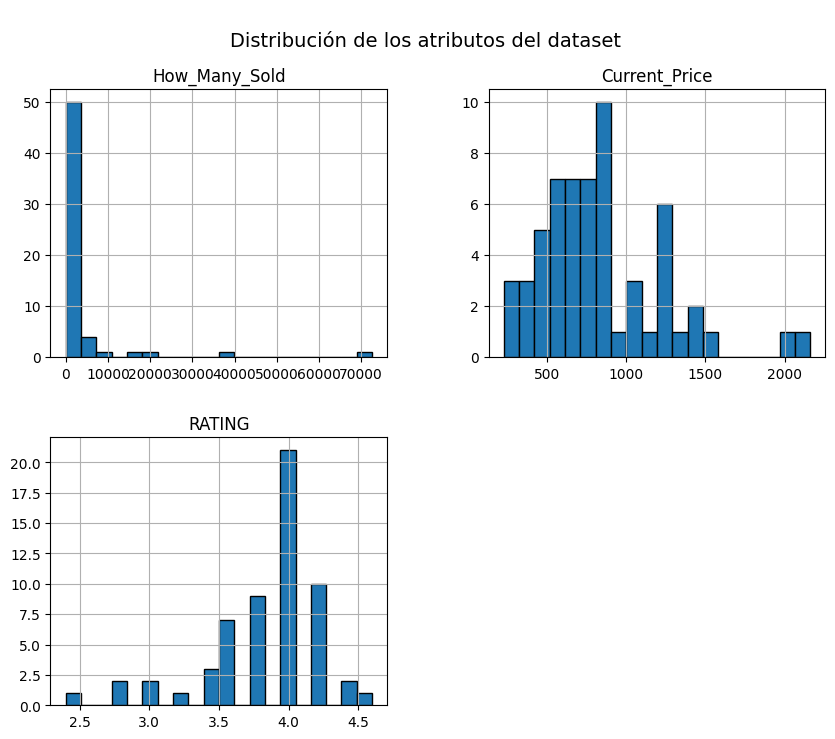

In [18]:
# Histograma de las variables numéricas
df.hist(figsize=(10,8), bins=20, edgecolor='black')
plt.suptitle("\nDistribución de los atributos del dataset", fontsize=14)
plt.show()

In [ ]:
# Medidas de tendencia central
print("\nMedia:")
print(df.mean(numeric_only=True))

print("\nMediana:")
print(df.median(numeric_only=True))

print("\nModa:")
print(df.mode().iloc[0])


Media:
How_Many_Sold    3497.083333
Current_Price     842.258621
RATING              3.836667
dtype: float64

Mediana:
How_Many_Sold    406.5
Current_Price    779.5
RATING             4.0
dtype: float64

Moda:
Brand_Name                                                     ASIAN
How_Many_Sold                                                  240.0
Current_Price                                                  499.0
Product_details    Men's Express-08 Sports Running,Walking,Gym,Tr...
RATING                                                           4.0
Name: 0, dtype: object


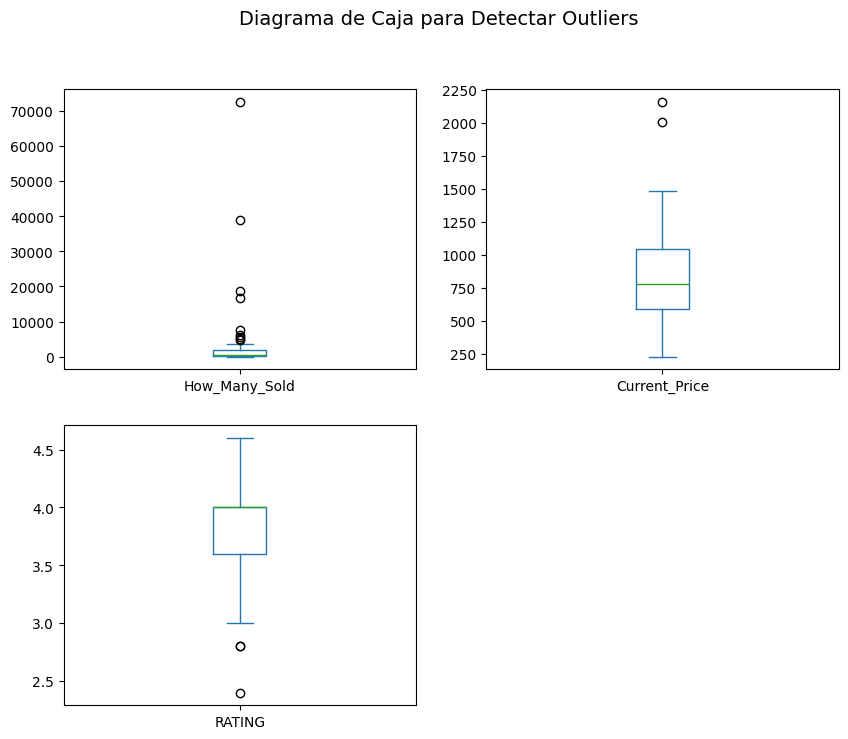

In [19]:
# Boxplot para detectar outliers
df.plot(kind='box', subplots=True, layout=(2,2), figsize=(10,8), sharex=False, sharey=False)
plt.suptitle("Diagrama de Caja para Detectar Outliers", fontsize=14)
plt.show()